In [11]:
from itertools import chain
prev_candidates = [["B", "A"], ["A", "C"], ["D", "C"]]
items = sorted(frozenset(chain.from_iterable(prev_candidates)))

In [12]:
items

['A', 'B', 'C', 'D']

'frozenset' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
x = [1, 2]
z = [1, 2 2, 4]

x in z

False

In [15]:
str(1)

'1'

In [16]:
str(z)

'[1, 2, 2, 4]'

In [18]:
string = ""
for num in z:
    string += str(num)
string

'1224'

In [19]:
len(string)

4

In [20]:
string[1]

'2'

In [21]:
X = None
x.append(X)

In [22]:
x

[1, 2, None]

In [25]:
string[-1:]

'4'

In [26]:
string[:-1]

'122'

In [27]:
string1 = "abc"
string2 = "def"
string3 = string1 + string2

In [15]:
def to_string(list_to_convert):
    """ Convert a list of item in a string ordered alphabetically/numericaly """
    string = ""
    for item in list_to_convert:
        string += str(item)

    return string

In [51]:
def generate_candidates(candidates):
    """ Generate initial candidates b ycombining strings that are identical, except for the last symbol"""
    itemset_str = []
    for itemset in candidates:
        itemset_str.append(to_string(sorted(itemset)))
    
    generated_candidates = []
    for i in range(len(itemset_str)):
        for j in range(len(itemset_str)):
            if i != j:
                if itemset_str[i][:-1] == itemset_str[j][:-1]:
                    new_candidate = itemset_str[i][:-1] + itemset_str[i][-1] + itemset_str[j][-1]
                    generated_candidates.append(new_candidate)

    return generated_candidates

In [53]:
candi = [['A', 'B', 'C'], ['A', 'B', 'D'], ['A', 'B', 'E']]
new_candi = generate_candidates(candi)

ABCD
ABCE
ABDC
ABDE
ABEC
ABED


In [54]:
new_candi

['ABCD', 'ABCE', 'ABDC', 'ABDE', 'ABEC', 'ABED']

In [14]:
def to_list(list_of_string):
    """ Convert a list of string in a list of list of characters """
    listed = []
    for item in list_of_string:
        listed.append(sorted(item))

    return listed

In [56]:
to_list(new_candi)

[['A', 'B', 'C', 'D'],
 ['A', 'B', 'C', 'E'],
 ['A', 'B', 'C', 'D'],
 ['A', 'B', 'D', 'E'],
 ['A', 'B', 'C', 'E'],
 ['A', 'B', 'D', 'E']]

In [57]:
'ab' in 'habc'

True

In [60]:
test_list = [1, 5, 3, 6, 3, 5, 6, 1] 
test_list = list(set(test_list)) 
test_list

[1, 3, 5, 6]

In [66]:
set(new_candi)

{'ABCD', 'ABCE', 'ABDC', 'ABDE', 'ABEC', 'ABED'}

In [71]:
aa = ['ba', 'cb', 'ab']
bb = ['21', '32', '12']
sorted(aa)

['ab', 'ba', 'cb']

In [73]:
class Dataset:
    """Utility class to manage a dataset stored in a external file."""

    def __init__(self, filepath):
        """reads the dataset file and initializes files"""
        self.transactions = list()
        self.items = set()

        try:
            lines = [line.strip() for line in open(filepath, "r")]
            lines = [line for line in lines if line]  # Skipping blank lines
            for line in lines:
                transaction = list(map(int, line.split(" ")))
                self.transactions.append(transaction)
                for item in transaction:
                    self.items.add(item)
        except IOError as e:
            print("Unable to read dataset file!\n" + e)

    def trans_num(self):
        """Returns the number of transactions in the dataset"""
        return len(self.transactions)

    def items_num(self):
        """Returns the number of different items in the dataset"""
        return len(self.items)

    def get_transaction(self, i):
        """Returns the transaction at index i as an int array"""
        return self.transactions[i]

In [74]:
dataset_path = "Datasets/toy.dat"
min_freq  = 0.125
dataset = Dataset("Datasets/toy.dat")
print(dataset.transactions)
print(dataset.items)

[[1, 2, 3], [2, 3, 4], [3, 4, 5], [2, 3], [3, 4], [1, 2, 3, 4], [1, 2, 4], [5]]
{1, 2, 3, 4, 5}


In [75]:
def projected_database(D, I, minSupp):
    transactions = []
    dico = {str(item) : 0 for item in dataset.items}
    I_str = to_string(I)
    for D_transaction in D.transactions:
        D_transaction_str = to_string(D_transaction)
        if I_str in D_transaction_str:
            transactions.append(D_transaction_str)
            for item in dico:
                if item in I_str:
                    continue
                if item in D_transaction_str:
                    dico[item] += 1
    # We keep only the frequent letters and delete the infrequent one from the transactions
    new_database = []
    for transaction in transactions:
        new_transaction = []
        for item in dico:
            if dico[item] >= minSupp:
                if item in transaction:
                    new_transaction.append(item)
        if new_transaction != []:
            new_database.append(new_transaction)
    D.transactions = new_database
    
    return D
    
                

In [78]:
print(projected_database(dataset, [1], 0.5).transactions)

[['2', '3'], ['2', '3', '4'], ['2', '4']]


In [ ]:
def dfs(I, D, minSupp):
    

In [ ]:
def depth_first_search(filepath, minFrequency):
    dataset = Dataset(filepath)
    minSupport = minFrequency * dataset.trans_num()
    

In [80]:
type(dataset.items)

set

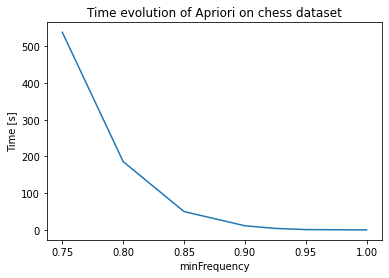

In [85]:
import matplotlib.pyplot as plt

plt.figure()

x = [1, 0.95, 0.925, 0.9, 0.85, 0.8, 0.75]
y = [0.07, 0.97, 4.14, 11.4, 50, 186, 538]

plt.plot(x,y)    
    
plt.title("Time evolution of Apriori on chess dataset")    
plt.ylabel('Time [s]')    
plt.xlabel('minFrequency')    
plt.show()    